In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import logging
logging.basicConfig(level=logging.INFO)

In [4]:
constant = xr.open_mfdataset('../Processed-Data/*.nc', group='ripple/constant')

In [5]:
constant

<xarray.Dataset>
Dimensions:               (neuron_id: 482, time: 449)
Coordinates:
  * time                  (time) float64 -0.09938 -0.09872 -0.09805 -0.09738 ...
  * neuron_id             (neuron_id) object 'HPa_04_02_001_001' ...
Data variables:
    firing_rate           (neuron_id, time) float64 0.06303 0.06303 0.06303 ...
    multiplicative_gain   (neuron_id, time) float64 1.0 1.0 1.0 1.0 1.0 1.0 ...
    baseline_firing_rate  (neuron_id) float64 0.06303 5.169 0.4412 0.2521 ...
    ks_statistic          (neuron_id) float64 0.07247 0.2021 0.5209 0.1489 ...
    AIC                   (neuron_id) float64 24.15 1.096e+03 129.8 79.53 ...

In [6]:
over_time = xr.open_mfdataset('../Processed-Data/*.nc', group='ripple/over_time')
over_time

<xarray.Dataset>
Dimensions:               (neuron_id: 482, time: 449)
Coordinates:
  * time                  (time) float64 -0.09938 -0.09872 -0.09805 -0.09738 ...
  * neuron_id             (neuron_id) object 'HPa_04_02_001_001' ...
Data variables:
    firing_rate           (neuron_id, time) float64 0.06071 0.06072 0.06073 ...
    multiplicative_gain   (neuron_id, time) float64 0.9704 0.9705 0.9706 ...
    baseline_firing_rate  (neuron_id) float64 0.06257 4.892 0.4271 0.25 ...
    ks_statistic          (neuron_id) float64 0.07111 0.2342 0.4473 0.1136 ...
    AIC                   (neuron_id) float64 nan nan nan nan nan nan nan ...

In [33]:
session_time = xr.open_mfdataset('../Processed-Data/*.nc', group='ripple/session_time', concat_dim='neuron_id')
session_time

<xarray.Dataset>
Dimensions:               (neuron_id: 482, session_time: 3, time: 449)
Coordinates:
  * session_time          (session_time) object 'early' 'late' 'middle'
  * time                  (time) float64 -0.09938 -0.09872 -0.09805 -0.09738 ...
  * neuron_id             (neuron_id) object 'HPa_04_02_001_001' ...
Data variables:
    firing_rate           (neuron_id, session_time, time) float64 0.05687 ...
    multiplicative_gain   (neuron_id, session_time, time) float64 0.9708 ...
    baseline_firing_rate  (neuron_id) float64 0.05858 7.772 0.2792 0.2693 ...
    ks_statistic          (neuron_id) float64 0.4871 0.3832 0.8373 0.7889 ...
    AIC                   (neuron_id) float64 nan nan nan nan nan nan nan ...

In [28]:
replay_state = xr.open_mfdataset('../Processed-Data/*.nc', group='ripple/replay_state', concat_dim='neuron_id')
replay_state

<xarray.Dataset>
Dimensions:               (neuron_id: 482, predicted_state: 4, time: 449)
Coordinates:
  * predicted_state       (predicted_state) object 'Inbound-Forward' ...
  * time                  (time) float64 -0.09938 -0.09872 -0.09805 -0.09738 ...
  * neuron_id             (neuron_id) object 'HPa_04_02_001_001' ...
Data variables:
    firing_rate           (neuron_id, predicted_state, time) float64 0.05594 ...
    multiplicative_gain   (neuron_id, predicted_state, time) float64 0.9712 ...
    baseline_firing_rate  (neuron_id) float64 0.05761 4.731 0.4747 0.2784 ...
    ks_statistic          (neuron_id) float64 0.489 0.4233 0.7952 0.7442 nan ...
    AIC                   (neuron_id) float64 nan nan nan nan nan nan nan ...

In [30]:
from loren_frank_data_processing import make_neuron_dataframe, make_epochs_dataframe
from src.parameters import ANIMALS

neuron_info = make_neuron_dataframe(ANIMALS)
neuron_info.head()

animal area       csi  day  \
animal day epoch tetrode_number neuron_number                              
HPa    1   1     1              1                HPa  CA1  0.193443    1   
                                2                HPa  CA1  0.145800    1   
                                3                HPa  CA1  0.083871    1   
                                4                HPa  CA1  0.165342    1   
                                5                HPa  CA1  0.090365    1   

                                               epoch  meanrate  \
animal day epoch tetrode_number neuron_number                    
HPa    1   1     1              1                  1  0.248777   
                                2                  1  0.257341   
                                3                  1  0.189641   
                                4                  1  0.256525   
                                5                  1  0.613785   

                                                       neuron_id  \
animal day epoch tetrode_number neuron_number                      
HPa    1   1     1              1              HPa_01_01_001_001   
                                2              HPa_01_01_001_002   
                                3              HPa_01_01_001_003   
                                4              HPa_01_01_001_004   
                                5              HPa_01_01_001_005   

                                               neuron_number  numspikes  \
animal day epoch tetrode_number neuron_number                             
HPa    1   1     1              1                          1      610.0   
                                2                          2      631.0   
                                3                          3      465.0   
                                4                          4      629.0   
                                5                          5     1505.0   

                                               propbursts  spikewidth  \
animal day epoch tetrode_number neuron_number                           
HPa    1   1     1              1                0.421311    8.404000   
                                2                0.334390   10.068208   
                                3                0.253763   10.591460   
                                4                0.392687    9.563608   
                                5                0.297010   11.086349   

                                               tetrode_number  
animal day epoch tetrode_number neuron_number                  
HPa    1   1     1              1                           1  
                                2                           1  
                                3                           1  
                                4                           1  
                                5                           1

In [31]:
epoch_info = make_epochs_dataframe(ANIMALS)

# Ripple over time

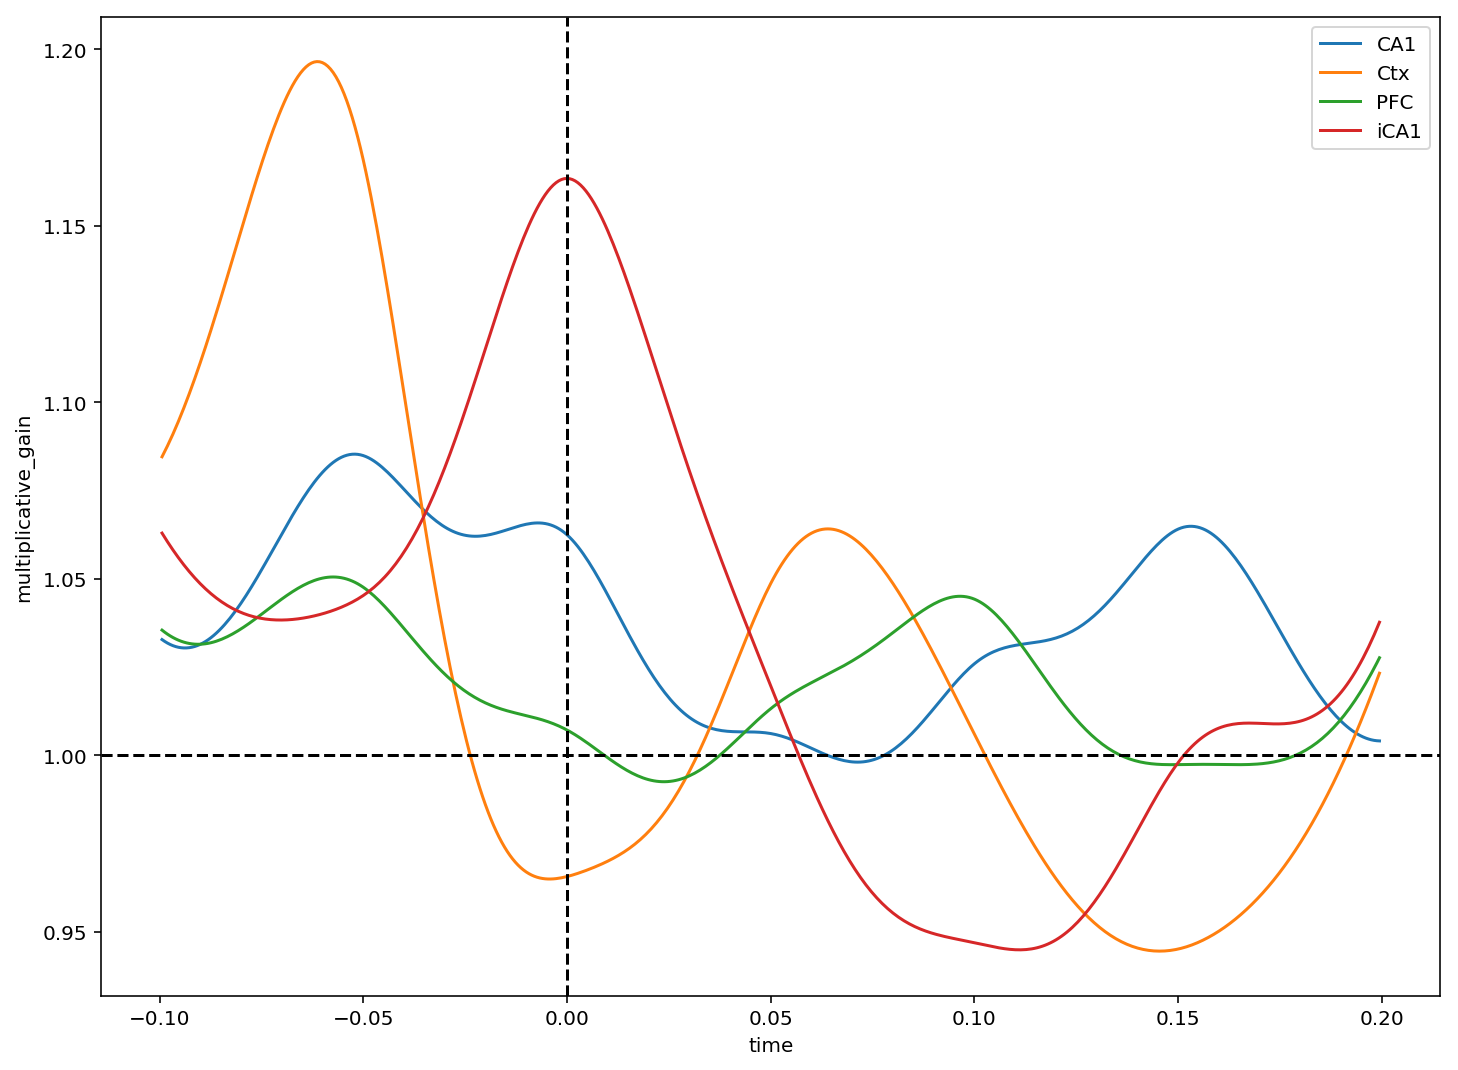

In [25]:
n = neuron_info.loc[neuron_info.neuron_id.isin(over_time.neuron_id.values)]
fig, ax = plt.subplots(figsize=(12, 9))
for id, group in n.groupby('area'):
    over_time.sel(neuron_id=group.neuron_id.values).mean('neuron_id').multiplicative_gain.plot(label=id, ax=ax)

ax.axvline(0, linestyle='--', color='black')
ax.axhline(1, linestyle='--', color='black')
plt.legend();

/projectnb/braincom/edeno/conda_envs/Jadhav-2016-Data-Analysis/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: 'animal' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  app.launch_new_instance()


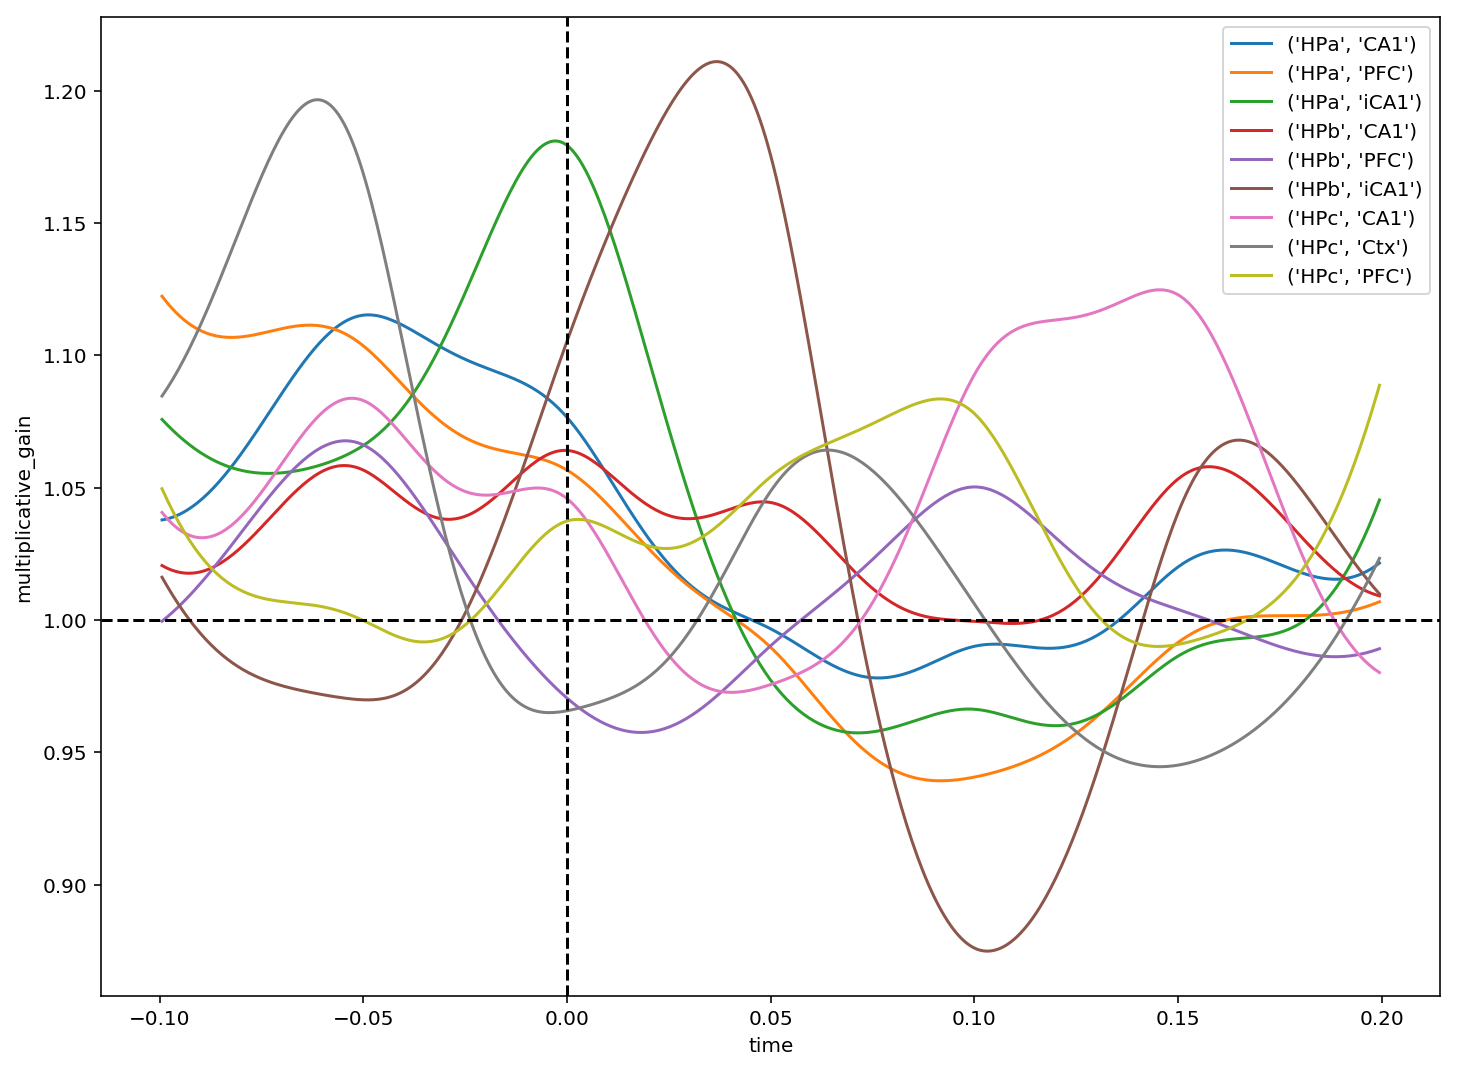

In [29]:
n = neuron_info.loc[neuron_info.neuron_id.isin(over_time.neuron_id.values)]
fig, ax = plt.subplots(figsize=(12, 9))
for id, group in n.groupby(['animal', 'area']):
    over_time.sel(neuron_id=group.neuron_id.values).mean('neuron_id').multiplicative_gain.plot(label=id, ax=ax)

ax.axvline(0, linestyle='--', color='black')
ax.axhline(1, linestyle='--', color='black')
plt.legend();

In [ ]:
n = neuron_info.loc[neuron_info.neuron_id.isin(over_time.neuron_id.values)]
fig, ax = plt.subplots(figsize=(12, 9))
for id, group in n.groupby(['animal', 'area']):
    over_time.sel(neuron_id=group.neuron_id.values).mean('neuron_id').multiplicative_gain.plot(label=id, ax=ax)

ax.axvline(0, linestyle='--', color='black')
ax.axhline(1, linestyle='--', color='black')
plt.legend();

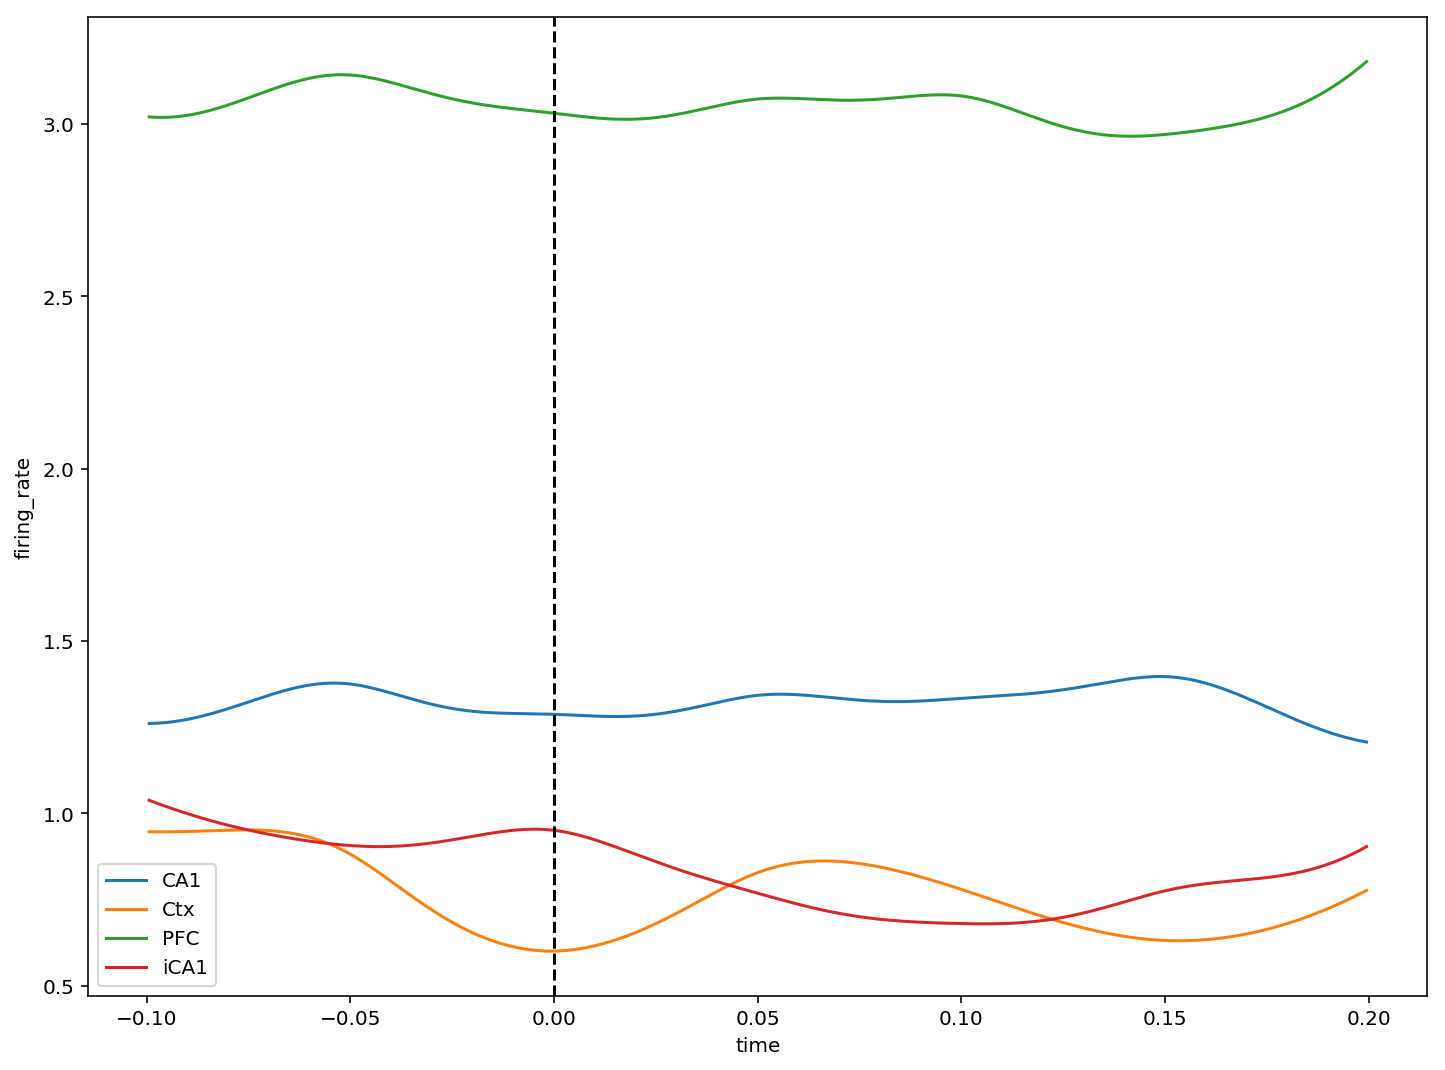

In [27]:
n = neuron_info.loc[neuron_info.neuron_id.isin(over_time.neuron_id.values)]
fig, ax = plt.subplots(figsize=(12, 9))
for id, group in n.groupby('area'):
    over_time.sel(neuron_id=group.neuron_id.values).mean('neuron_id').firing_rate.plot(label=id, ax=ax)

ax.axvline(0, linestyle='--', color='black')
plt.legend();

/projectnb/braincom/edeno/conda_envs/Jadhav-2016-Data-Analysis/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: 'animal' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  app.launch_new_instance()


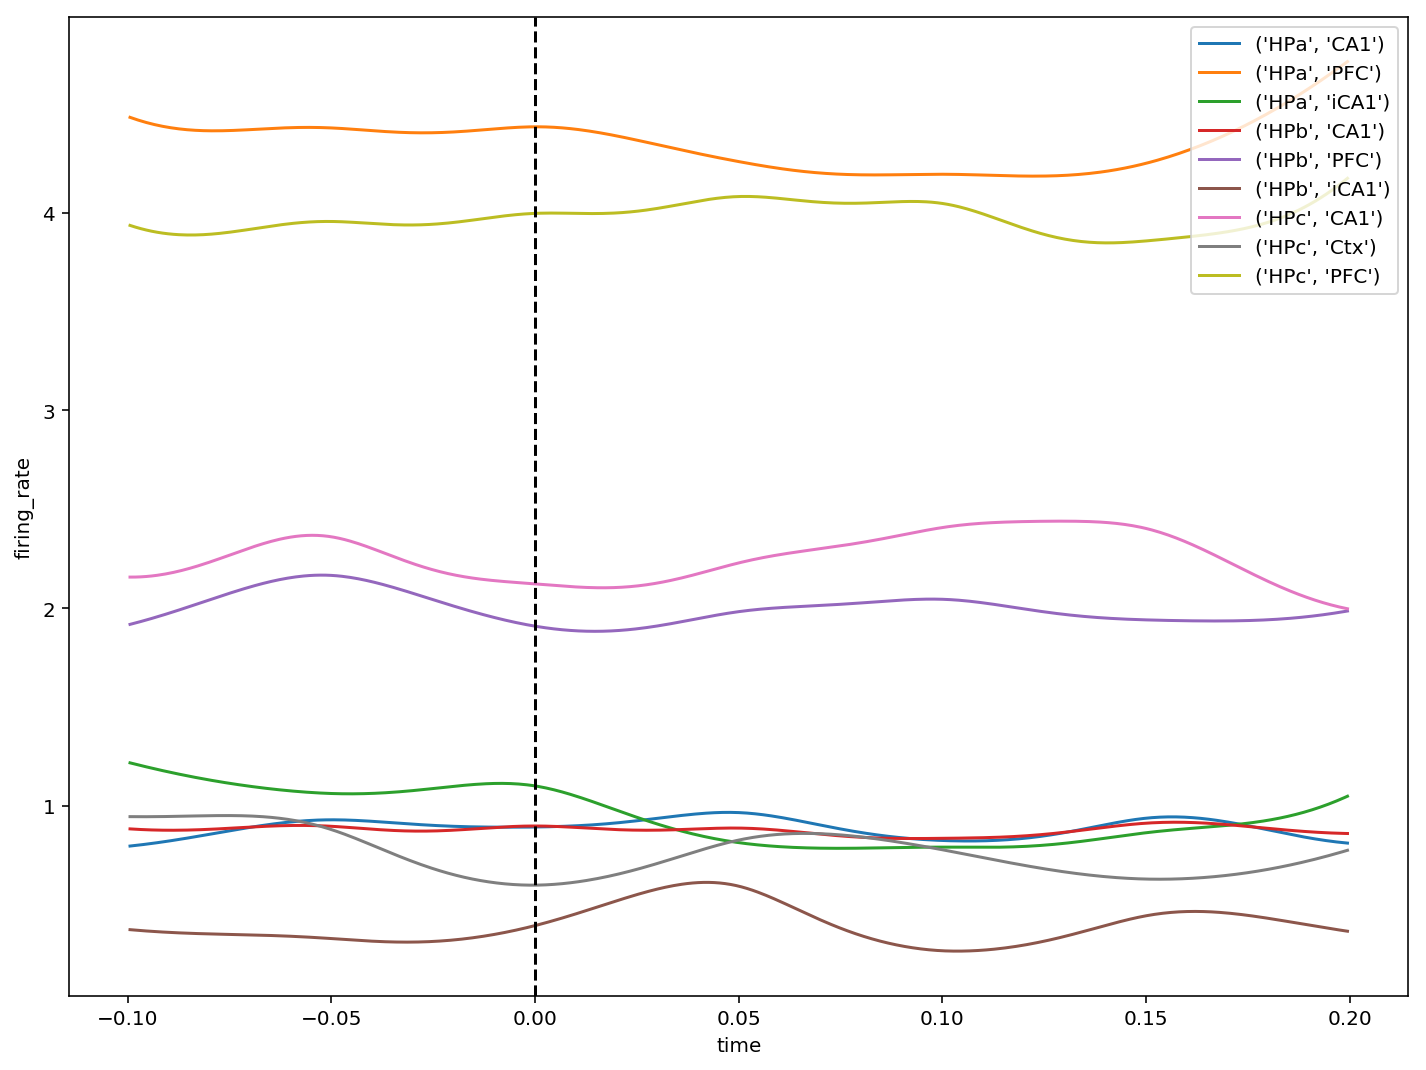

In [32]:
n = neuron_info.loc[neuron_info.neuron_id.isin(over_time.neuron_id.values)]
fig, ax = plt.subplots(figsize=(12, 9))
for id, group in n.groupby(['animal', 'area']):
    over_time.sel(neuron_id=group.neuron_id.values).mean('neuron_id').firing_rate.plot(label=id, ax=ax)

ax.axvline(0, linestyle='--', color='black')
plt.legend();

## Session Time

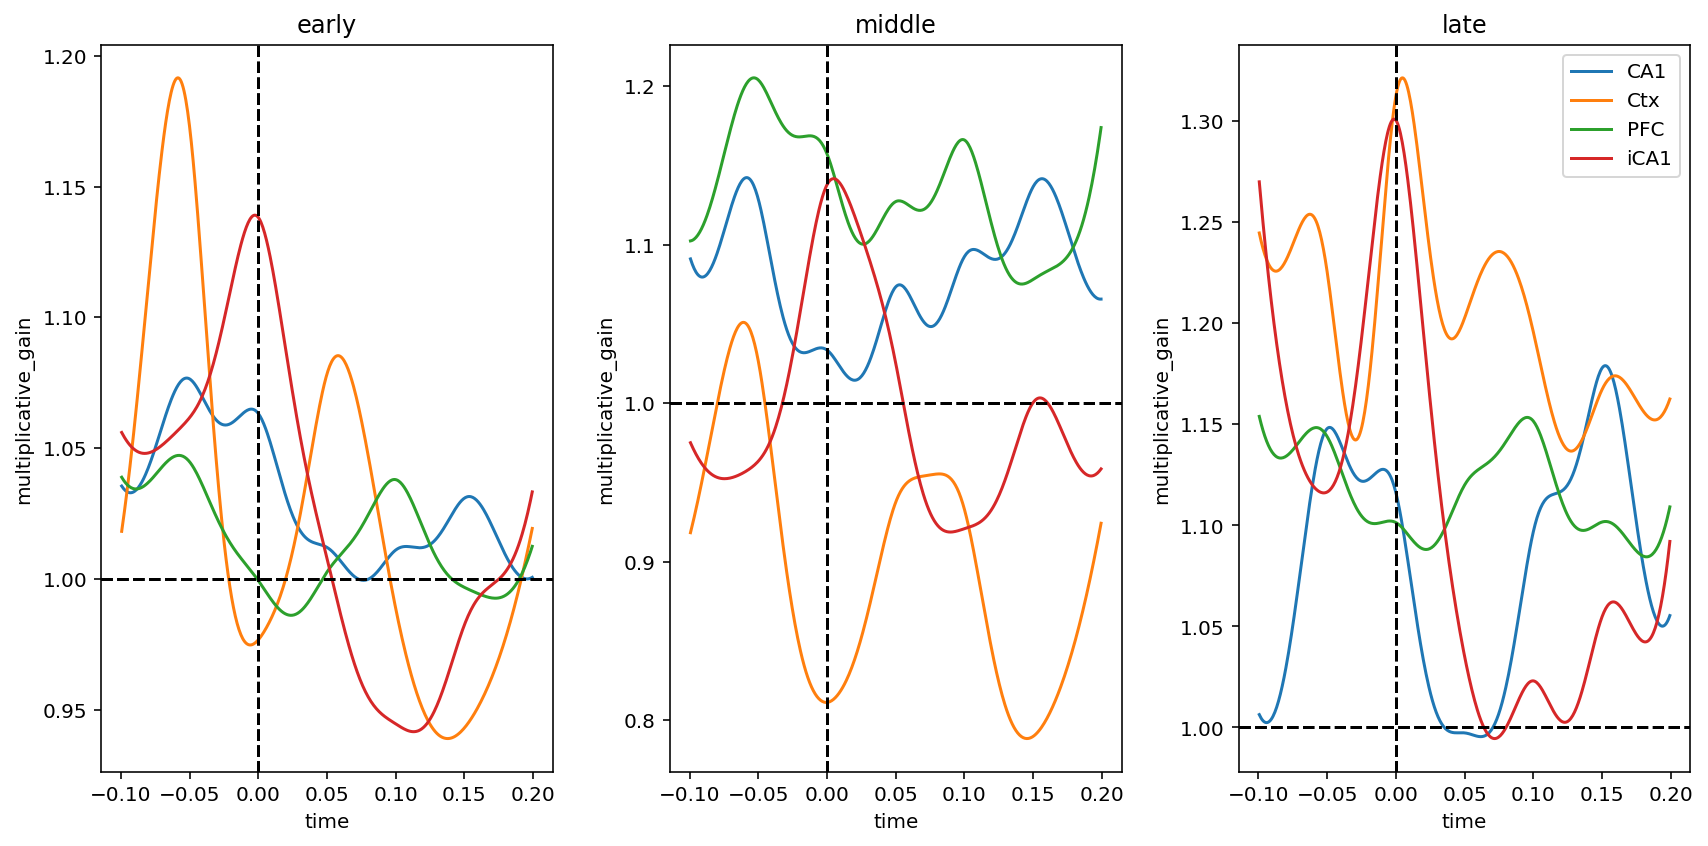

In [51]:
n = neuron_info.loc[neuron_info.neuron_id.isin(over_time.neuron_id.values)]
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
for id, group in n.groupby('area'):
    for ax, st in zip(axes, ['early', 'middle', 'late']):
        (session_time.sel(neuron_id=group.neuron_id.values)
         .sel(session_time=st).multiplicative_gain.mean('neuron_id').plot(label=id, ax=ax))
        ax.axvline(0, linestyle='--', color='black')
        ax.axhline(1, linestyle='--', color='black')
        ax.set_title(st)
        plt.tight_layout()
        plt.legend();

## Ripple by replay state

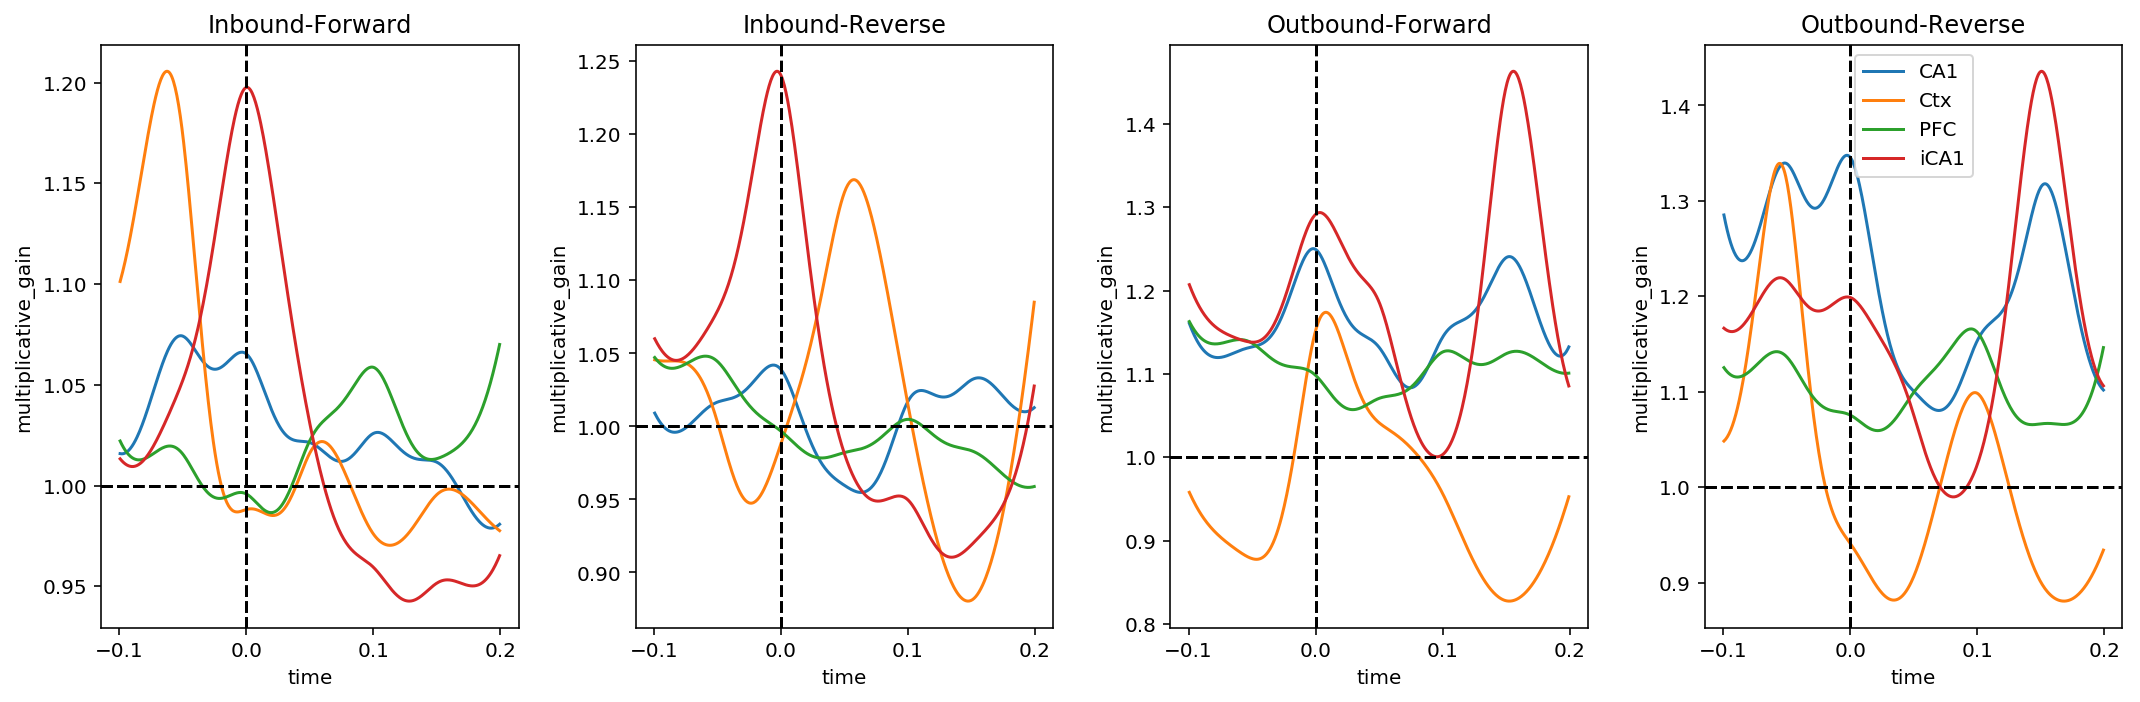

In [50]:
n = neuron_info.loc[neuron_info.neuron_id.isin(over_time.neuron_id.values)]
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for id, group in n.groupby('area'):
    for ax, st in zip(axes, ['Inbound-Forward', 'Inbound-Reverse', 'Outbound-Forward', 'Outbound-Reverse']):
        (replay_state.sel(neuron_id=group.neuron_id.values)
         .sel(predicted_state=st).multiplicative_gain.mean('neuron_id').plot(label=id, ax=ax))
        ax.axvline(0, linestyle='--', color='black')
        ax.axhline(1, linestyle='--', color='black')
        ax.set_title(st)
        plt.tight_layout()
        plt.legend();

# KS

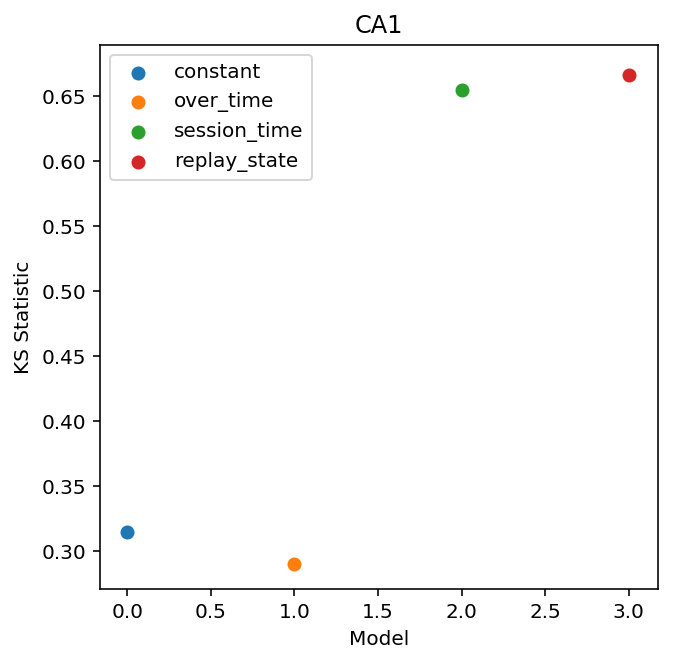

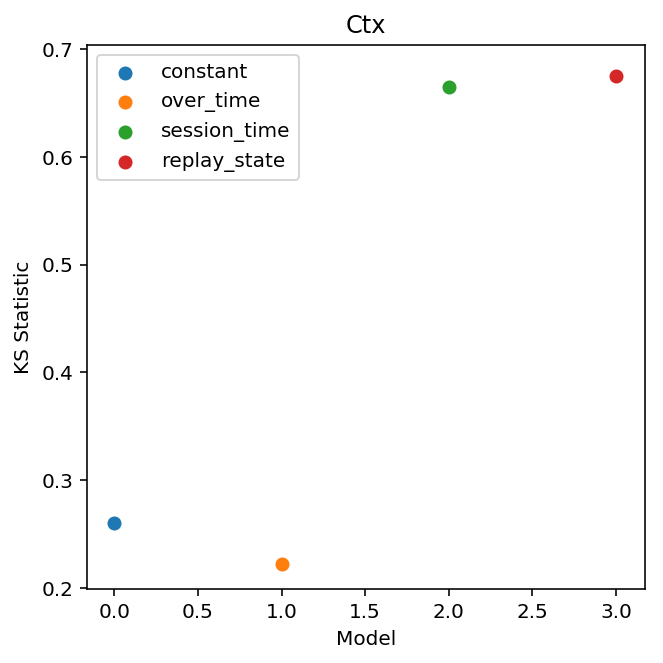

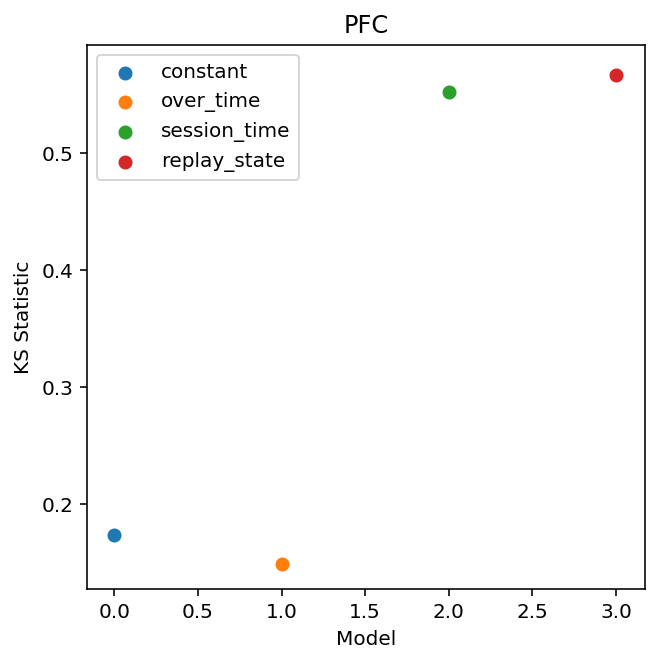

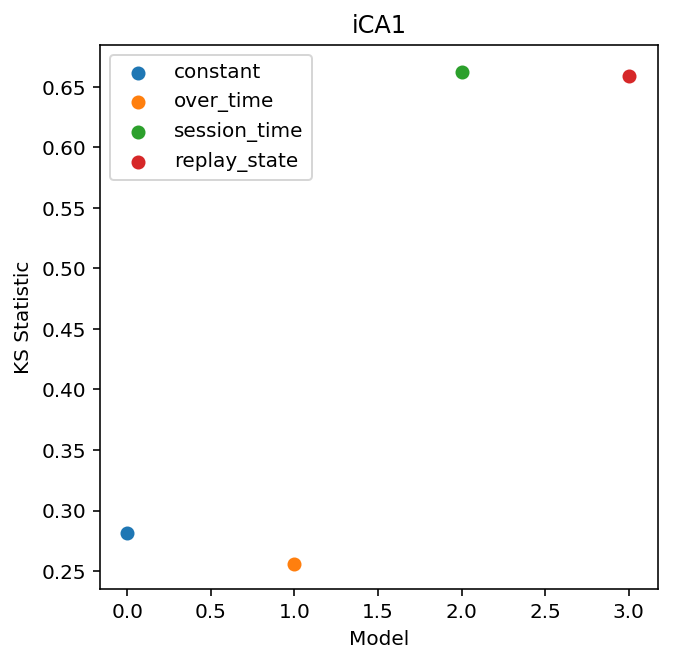

In [62]:
n = neuron_info.loc[neuron_info.neuron_id.isin(over_time.neuron_id.values)]
labels = ['constant', 'over_time', 'session_time', 'replay_state']
for id, group in n.groupby('area'):
    fig, axes = plt.subplots(1, 1, figsize=(5, 5))
    for i, m in enumerate([constant, over_time, session_time, replay_state]):
        ks = m.sel(neuron_id=group.neuron_id.values).ks_statistic.mean()
        plt.scatter(i, ks, label=labels[i])
        plt.legend()
        plt.title(id)
        plt.ylabel('KS Statistic')
        plt.xlabel('Model')